In [270]:
import pandas as pd

In [271]:
df = pd.read_csv('data_category.csv')

In [272]:
df.columns

Index(['acct_id', 'RPTG_SLS_MGMT_LVL_1', 'DELL_INDUSTRY_TAXONOMY_L1',
       'ORG_USER_DEFINED_VALUE_113', 'emp_size', 'buy_power', 'decision_maker',
       'time_taking'],
      dtype='object')

In [273]:
df.head()

,acct_id,RPTG_SLS_MGMT_LVL_1,DELL_INDUSTRY_TAXONOMY_L1,ORG_USER_DEFINED_VALUE_113,emp_size,buy_power,decision_maker,time_taking
0,1,APJ,Manufacturing,T1,4275,1421420.539,0,0
1,2,CSB,Agriculture,T5,20,125374.000,1,0
2,3,CSB,Agriculture,T5,7725,109690.000,1,0
3,4,EMEA,"Business, Engineering & Consumer Services",T3,239,176520.000,0,0
4,5,NAMERICA,"Telecom, Media & Entertainment",T2,80,45000.000,0,0


In [276]:
df2 = df.groupby(['DELL_INDUSTRY_TAXONOMY_L1','time_taking']).size().reset_index()

In [277]:
df2

,DELL_INDUSTRY_TAXONOMY_L1,time_taking,0
0,Agriculture,0,2601
1,Agriculture,1,2
2,"Banking, Financial Services & Insurance",0,1917
3,"Banking, Financial Services & Insurance",1,65
4,"Banking, Financial Services & Insurance",2,7
5,"Business, Engineering & Consumer Services",0,3650
6,"Business, Engineering & Consumer Services",1,33
7,"Business, Engineering & Consumer Services",2,1
8,Construction & Real Estate,0,458
9,Construction & Real Estate,1,4


<AxesSubplot:xlabel='time_taking'>

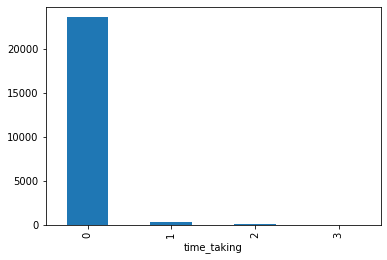

In [278]:
df.groupby(['time_taking']).size().plot(kind='bar')

In [279]:
from keras.models import Sequential
from keras.layers import Dense

In [280]:
in_data = df[['RPTG_SLS_MGMT_LVL_1', 'DELL_INDUSTRY_TAXONOMY_L1',
       'ORG_USER_DEFINED_VALUE_113', 'emp_size', 'buy_power', 'decision_maker','time_taking']]
df = df.fillna(0)
in_data = pd.get_dummies(in_data, columns=['RPTG_SLS_MGMT_LVL_1', 'DELL_INDUSTRY_TAXONOMY_L1',
       'ORG_USER_DEFINED_VALUE_113'])

In [281]:
in_data.columns

Index(['emp_size', 'buy_power', 'decision_maker', 'time_taking',
       'RPTG_SLS_MGMT_LVL_1_APJ', 'RPTG_SLS_MGMT_LVL_1_CSB',
       'RPTG_SLS_MGMT_LVL_1_EMEA', 'RPTG_SLS_MGMT_LVL_1_Greater China',
       'RPTG_SLS_MGMT_LVL_1_LA', 'RPTG_SLS_MGMT_LVL_1_NAMERICA',
       'DELL_INDUSTRY_TAXONOMY_L1_Agriculture',
       'DELL_INDUSTRY_TAXONOMY_L1_Banking, Financial Services & Insurance',
       'DELL_INDUSTRY_TAXONOMY_L1_Business, Engineering & Consumer Services',
       'DELL_INDUSTRY_TAXONOMY_L1_Construction & Real Estate',
       'DELL_INDUSTRY_TAXONOMY_L1_Education',
       'DELL_INDUSTRY_TAXONOMY_L1_Energy',
       'DELL_INDUSTRY_TAXONOMY_L1_Government',
       'DELL_INDUSTRY_TAXONOMY_L1_Healthcare & Life Sciences',
       'DELL_INDUSTRY_TAXONOMY_L1_Manufacturing',
       'DELL_INDUSTRY_TAXONOMY_L1_Retail',
       'DELL_INDUSTRY_TAXONOMY_L1_Telecom, Media & Entertainment',
       'DELL_INDUSTRY_TAXONOMY_L1_Transportation',
       'DELL_INDUSTRY_TAXONOMY_L1_Web & Tech', 'ORG_USER_DEFIN

In [283]:
from sklearn.utils import shuffle
import numpy as np
in_data = shuffle(in_data)
X = in_data.drop(['time_taking'], axis = 1)
X = np.array(X)
Y = np.array(in_data['time_taking'])

In [284]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)


In [285]:
Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [286]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.3, random_state = 0)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((16692, 27), (16692, 4), (7155, 27), (7155, 4))

In [288]:
in_dim = len(in_data.columns)-1

model = Sequential()
model.add(Dense(8, input_dim = in_dim, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(train_x, train_y, epochs = 5, batch_size = 5)
scores = model.evaluate(test_x, test_y)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

Epoch 1/5
3339/3339 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.7550
Epoch 2/5
3339/3339 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.9871
Epoch 3/5
3339/3339 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.9871
Epoch 4/5
3339/3339 [==============================] - 6s 2ms/step - loss: nan - accuracy: 0.9871
Epoch 5/5
224/224 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.9869

loss: nan

accuracy: 0.987


In [289]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 8)                 224       
                                                                 
 dense_39 (Dense)            (None, 4)                 36        
                                                                 
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [290]:
y_pred = model.predict(test_x)

224/224 [==============================] - 0s 1ms/step


In [291]:
from sklearn import metrics
metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

array([[7061,    0,    0],
       [  85,    0,    0],
       [   9,    0,    0]], dtype=int64)

In [292]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [293]:
in_data = in_data.fillna(0)

In [294]:
train, test = train_test_split(in_data, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(16692, 28)
(7155, 28)


In [295]:
train_X = train.drop(['time_taking'], axis = 1)# taking the training data features
train_y=train.time_taking# output of our training data
test_X=  test.drop(['time_taking'], axis = 1)# taking test data features
test_y =test.time_taking   #output value of test data

In [301]:
import warnings
warnings.filterwarnings("ignore")

In [334]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9932914046121594


In [321]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, prediction)

array([[7070,    0,    0,    0],
       [  43,   29,    1,    2],
       [   0,    1,    8,    1],
       [   0,    0,    0,    0]], dtype=int64)

In [322]:
from sklearn.metrics import precision_recall_fscore_support

In [325]:
print("F1 Score")
print(f1_score(test_y, prediction, average="macro"))
print("\nprecision")
print(precision_score(test_y, prediction, average="macro"))
print("\nRecall")
print(recall_score(test_y, prediction, average="macro"))

F1 Score
0.5978636042266705

precision
0.7123775715825484

Recall
0.5466666666666666


In [326]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9881201956673655


In [327]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, prediction)

array([[7070,    0,    0],
       [  75,    0,    0],
       [  10,    0,    0]], dtype=int64)

In [328]:
print("F1 Score")
print(f1_score(test_y, prediction, average="macro"))
print("\nprecision")
print(precision_score(test_y, prediction, average="macro"))
print("\nRecall")
print(recall_score(test_y, prediction, average="macro"))

F1 Score
0.3313415348564734

precision
0.3293733985557885

Recall
0.3333333333333333


In [329]:
# Decision Tree Classifier
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 1.0


In [330]:
# Decision Tree Confusion Matrix
confusion_matrix(test_y, prediction)

array([[7070,    0,    0],
       [   0,   75,    0],
       [   0,    0,   10]], dtype=int64)

In [331]:
print("F1 Score")
print(f1_score(test_y, prediction, average="macro"))
print("\nprecision")
print(precision_score(test_y, prediction, average="macro"))
print("\nRecall")
print(recall_score(test_y, prediction, average="macro"))

F1 Score
1.0

precision
1.0

Recall
1.0


In [333]:
from joblib import dump, load

In [335]:
dump(model, 'lr.joblib')

['lr.joblib']

In [336]:
dump(train_X.columns, 'columns.joblib')

['columns.joblib']